In [1]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset


# Loading the dataset from Hugging Face
dataset = load_dataset("tanzuhuggingface/creditcardfraudtraining")
df   = pd.DataFrame(dataset['train'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/182 [00:00<?, ?B/s]

credit_card_resampled.csv:   0%|          | 0.00/163M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2085138 [00:00<?, ? examples/s]

In [3]:

# Inspecting the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   id   index  time_elapsed        cc_num     amt      lat      long  is_fraud
0   0  347210             1  4.158950e+15    3.34  40.4308  -79.9205         0
1   1  347244             1  4.797300e+18   16.54  38.8938  -86.5246         0
2   2  347249             1  4.586810e+15   29.84  32.5486  -80.3070         0
3   3  347278             1  4.956830e+18  101.56  40.6747  -74.2239         0
4   4  347293             2  4.561550e+12    3.59  34.9889 -106.0610         0


In [4]:

# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
id              0
index           0
time_elapsed    0
cc_num          0
amt             0
lat             0
long            0
is_fraud        0
dtype: int64


In [5]:

# Basic statistics of the dataset
print("\nDataset Statistics:")
print(df.describe())



Dataset Statistics:
                 id         index  time_elapsed        cc_num           amt  \
count  2.085138e+06  2.085138e+06  2.085138e+06  2.085138e+06  2.085138e+06   
mean   1.042568e+06  5.049692e+05  1.169697e+00  3.965088e+17  2.992306e+02   
std    6.019276e+05  4.089742e+05  7.291183e+00  1.637756e+18  4.955343e+02   
min    0.000000e+00 -1.612912e+06 -3.000000e+01 -6.986079e+18 -2.159578e+03   
25%    5.212842e+05  2.117852e+05  0.000000e+00  6.304420e+11  1.501000e+01   
50%    1.042568e+06  5.054810e+05  0.000000e+00  3.543300e+15  8.474000e+01   
75%    1.563853e+06  8.031388e+05  2.000000e+00  5.330299e+17  5.406551e+02   
max    2.085137e+06  2.794497e+06  8.300000e+01  1.122925e+19  2.894890e+04   

                lat          long   is_fraud  
count  2.085138e+06  2.085138e+06  2085138.0  
mean   3.858014e+01 -9.004107e+01        0.5  
std    6.704931e+00  1.827680e+01        0.5  
min    1.511058e+00 -2.269371e+02        0.0  
25%    3.408775e+01 -9.925484e+0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085138 entries, 0 to 2085137
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   index         int64  
 2   time_elapsed  int64  
 3   cc_num        float64
 4   amt           float64
 5   lat           float64
 6   long          float64
 7   is_fraud      int64  
dtypes: float64(4), int64(4)
memory usage: 127.3 MB


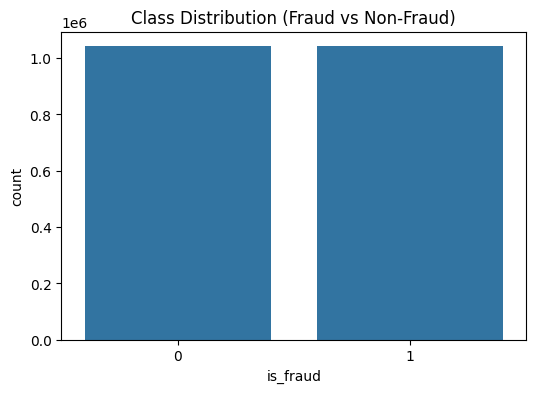

In [7]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()




In [8]:
# Calculate the percentage of fraud cases
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100
print("\nClass Distribution (Percentage):")
print(fraud_percentage)


Class Distribution (Percentage):
is_fraud
0    50.0
1    50.0
Name: proportion, dtype: float64


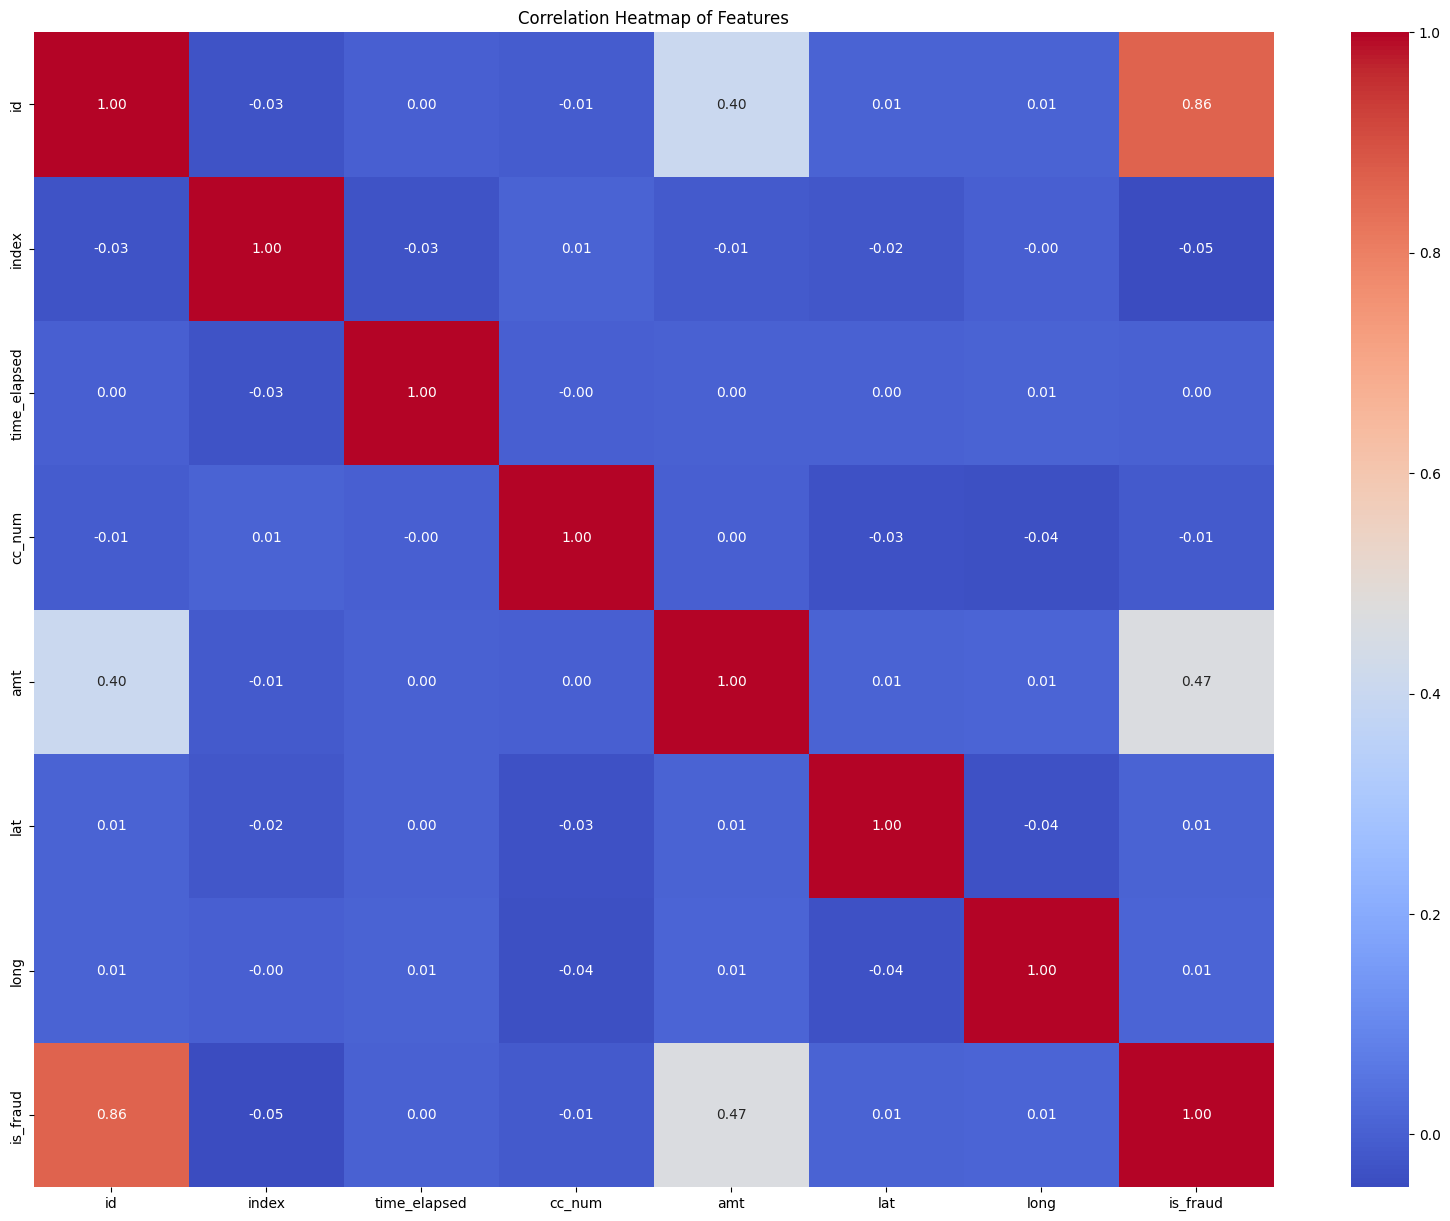

In [9]:
# Correlation heatmap to analyze feature relationships
plt.figure(figsize=(20, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


<ipython-input-10-c7e6d52bd2d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_fraud', palette="pastel")


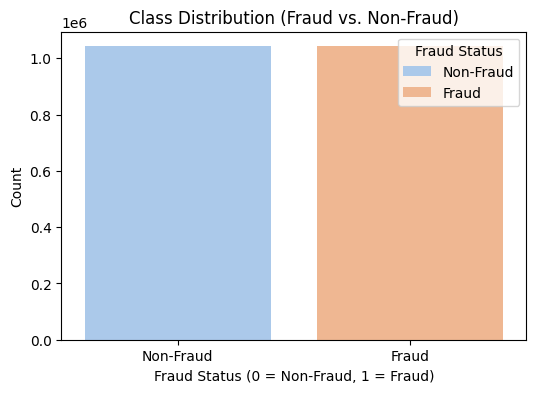

In [10]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_fraud', palette="pastel")
plt.title("Class Distribution (Fraud vs. Non-Fraud)")
plt.xlabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks([0, 1], labels=["Non-Fraud", "Fraud"])
plt.legend(title="Fraud Status", labels=["Non-Fraud", "Fraud"])
plt.show()

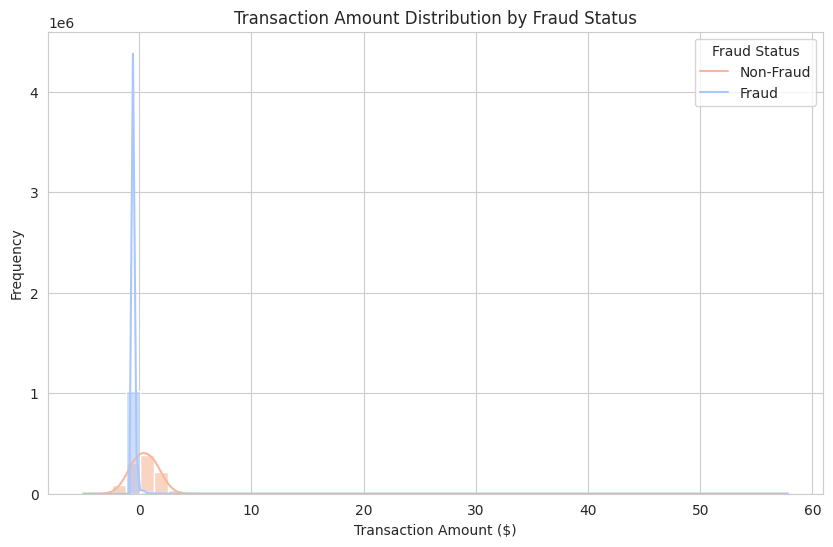

In [ ]:
# Transaction Amount (amt) for Fraud and Non-Fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=50, kde=True, palette="coolwarm", alpha=0.6)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.legend(title="Fraud Status", labels=["Non-Fraud", "Fraud"])
plt.show()
